In [1]:
import ptc_track.optics_parameters as mop
import ptc_track.madx_configuration as mc
import approximator.optics_parameters as aop
import approximator.runner as ap_runner
import data.bunch_configuration as buc
import visualization.optics_parameter_visualisation as opv
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import ROOT
import os
from ROOT import gSystem, gInterpreter
import data.bunch_configuration as buc
import models.train_model as tram
import models.approximator as stub_app
import twiss.madx_configuration as twiss_conf
import twiss.optics_parameters as twiss_op_fun

sns.set_style("whitegrid")

Welcome to JupyROOT 6.18/00


In [2]:
path_to_project = "/home/rafalmucha/Pobrane/optic"
folder_name = "2017_matched"
ptc_twiss_script_file_name = "ptc_twiss_script.madx"
twiss_script_file_name = "script_twiss.madx"
xml_file_name = "configuration_reco_beam1.xml"
path_to_configuration = os.path.join(path_to_project, folder_name)
path_to_xml_file = os.path.join(path_to_project, folder_name, xml_file_name)
item_number = 3
track_configuration = mc.TrackConfiguration(path_to_xml_file, item_number, path_to_configuration)
twiss_conf_obj = twiss_conf.TwissConfiguration(os.path.join(path_to_project, folder_name, twiss_script_file_name), 219.551)

In [3]:
# Parameters of bunch
x_mean = 0
sigma_x = 0
theta_x_mean = 1.5e-4
sigma_theta_x = 0
y_mean = -1.5e-3
sigma_y = 0
theta_y_mean = 0
sigma_theta_y = 0
pt_mean = -0.1
sigma_pt = 0.1

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 11

In [4]:
subtitle = ""
plot_size = 5
grid_x_resolution = 5
grid_y_resolution = 7

In [5]:
bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

In [6]:
parameter_from_name = "pt"

In [7]:
transporter1_name = "220 h 2 ptc_track"
transporter2_name = "220 h 2 approximator"
transporter3_name = "twiss"

In [11]:
def wrap_and_print(*a):
    res = twiss_op_fun.compute_d_x(*a)
    print(res)
    return res

/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss2
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss3
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss0
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss1
twiss_madx_script
twiss_madx_script
twiss_madx_script
twiss_madx_script
Dupa
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss4
twiss_madx_script
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss5
twiss_madx_script
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss6
twiss_madx_script
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss7
twiss_madx_script
Dupa
Dupa
Dupa
Dupa
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss8
twiss_madx_script
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss9
twiss_madx_script
/home/rafalmucha/Pobrane/optic/optics_generator_python/notebooks/twiss10
tw

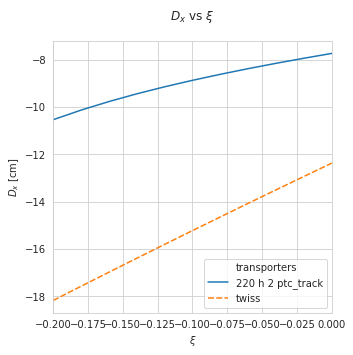

In [12]:
transporters = {
    transporter1_name: (mop.compute_d_x, track_configuration),
    transporter3_name: (wrap_and_print, twiss_conf_obj)
}
opv.plot_optical_functions(bunch_configuration, transporters, parameter_from_name, "D x", subtitle)

In [9]:
transporters = {
    transporter1_name: (mop.compute_v_y, track_configuration),
    transporter2_name: (aop.compute_v_y, approximator),
    transporter3_name: (aop.compute_v_y, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, parameter_from_name, "V y", subtitle)

NameError: name 'approximator' is not defined

In [ ]:
transporters = {
    transporter1_name: (mop.compute_l_x, track_configuration),
    transporter2_name: (aop.compute_l_x, approximator),
    transporter3_name: (aop.compute_l_x, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, parameter_from_name, "L x", subtitle)

In [ ]:
transporters = {
    transporter1_name: (mop.compute_l_y, track_configuration),
    transporter2_name: (aop.compute_l_y, approximator),
    transporter3_name: (aop.compute_l_y, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, parameter_from_name, "L y", subtitle)

In [ ]:
transporters = {
    transporter1_name: (mop.compute_d_x, track_configuration),
    transporter2_name: (aop.compute_d_x, approximator),
    transporter3_name: (aop.compute_d_x, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, parameter_from_name, "D x", subtitle)

In [ ]:
transporters = {
    transporter1_name: (mop.compute_d_y, track_configuration),
    transporter2_name: (aop.compute_d_y, approximator),
    transporter3_name: (aop.compute_d_y, prototype_approximator)
}
opv.plot_optical_functions(bunch_configuration, transporters, parameter_from_name, "D y", subtitle)